## Homework 1

Herein you can find exercises to improve your basic python skills in the basic control statements, functions, computation with `numpy` and plotting with `matplotlib`. 

If you get stuck, don't worry about asking a friend for help! You are encouraged to work together in these exercises.

## Introduction to This Template Notebook

**How to use?**:
* Run the code cell by putting the cursor there and pressing **Control-Enter**.

* The locations where you should write your solutions can be recognized by the following comment.

* Double-clicking markdown cells will reveal their content. Press **Control-Enter** to make the cells user-friendly again. 

>`# WRITE YOUR CODE HERE`

**Make sure to clear your variables using `%reset -f` when you are done with an exercise and run it from top to bottom**

<hr style="border:2px solid #eee">

## Exercise 1: numpy arrays and the dot product

You can think of numpy arrays as flexible containers for numbers. They can be used for vectors, matrices, or even more complex structures. To create a matrix, just put rows inside a list. For example:
```python
import numpy as np

M = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 3]])
```
To pick values from this matrix, we use `M[i, j]` where i is the row index and j is the column index. To get the first column, use `M[:, 0]`. To get the first row, use `M[0, :]`

a) Write Python code to implement the dot product formula using three nested loops inside the function `dotMatMat(A,B)`.
The dot product of two matrices is found using this formula:

$$M_{ij} = \sum_k{A_{ik}B_{kj}}$$

> Hint: You can find the number of rows and columns with A.shape and B.shape.

In [5]:
import numpy as np

A = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 3]])

B = np.array([[0, 0, 0.33],
              [0.18, 2, 0],
              [0, 0.71, 0.94]])

def dotMatMat(A,B):
  """ Computes the dot product of matrix A and B and returns the result """
  # Getting the sizes of each matrix along each axis
  Ni = A.shape[0]
  Nj = B.shape[1]
  Nk = A.shape[1] # = B.shape[0]

  # Allocating memory for the resulting matrix
  M = np.zeros((Ni,Nj)) # Making an empty matrix to store your resulting matrix

  #! BEGIN ANSWER
  for i in range(Ni):
    for j in range(Nj):
      for k in range(Nk):
        M[i,j] += A[i,k]*B[k,j]
  #! END ANSWER

  return M

print(dotMatMat(A,B))

[[0.   0.   0.33]
 [0.36 4.   0.  ]
 [0.   2.13 2.82]]


b) Perform this same operation using the `@` operator (dot product operator), `np.dot` and `A.dot(B)`.

In [6]:
import numpy as np

A = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 3]])

B = np.array([[0, 0, 0.33],
              [0.18, 2, 0],
              [0, 0.71, 0.94]])

#! BEGIN EXCLUDE
print(r"`A@B = `")
#! END EXCLUDE
#! BEGIN ANSWER
print(A@B)
#! BEGIN EXCLUDE
print()
print(r"`np.dot(A,B) = `")
#! END EXCLUDE
print(np.dot(A,B))
#! BEGIN EXCLUDE
print()
print(r"`A.dot(B) = `")
#! END EXCLUDE
print(A.dot(B))
#! END ANSWER

`A@B = `
[[0.   0.   0.33]
 [0.36 4.   0.  ]
 [0.   2.13 2.82]]

`np.dot(A,B) = `
[[0.   0.   0.33]
 [0.36 4.   0.  ]
 [0.   2.13 2.82]]

`A.dot(B) = `
[[0.   0.   0.33]
 [0.36 4.   0.  ]
 [0.   2.13 2.82]]


c) Below you can find a matrix `R` and a vector `p0` defined. Carry out the dot product between `R` and `p0` using the `@` operator to generate `p1`. Do so 500 times and store all the intermediate results. Finally, take the first number in each point as an `x` coordinate and the second as a `y` coordinate. Plot all points.

> Hint: Make a for loop. In each loop take the previous position, apply the linear transformation `R`, and store the result to be used in the next iteration.

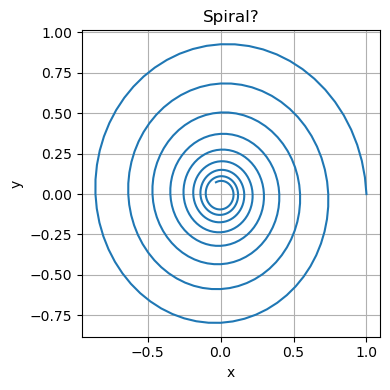

In [7]:
import numpy as np
import matplotlib.pyplot as plt

R = np.array([[ 0.9895, -0.104 ],
              [ 0.104 ,  0.9895]])
x = np.array([1, 0])

# Define your variables
#! BEGIN ANSWER
N = 500 # Number of points
pts = np.zeros((2, N)) # Array of points
pts[:, 0] = x # Settinig the initial point
#! END ANSWER

# Looping over points and transforming them
#! BEGIN ANSWER
for i in range(1,N):
  # Computing and storing next point
  pts[:, i] = R@pts[:, i-1]
#! END ANSWER

# Plotting the collection of points
#! BEGIN ANSWER
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(*pts)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spiral?")
plt.grid()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()
#! END ANSWER

> Now run the cell below to clear all your variables before moving on to the next exercise

In [8]:
%reset -f

## Exercise 2: Measuring $\pi$ with a montecarlo simulation

There's an interesting method to estimate the value of $\pi$ using a Monte Carlo simulation. Here's how it works:

Imagine a circle with a radius of $r = 1$ enclosed within a square domain where $x$ and $y$ range between [$-1$, $1$]. The area of the square is 4. By generating $N$ random points within this square, you can determine the fraction of points that fall inside the circle defined by $x^2 + y^2 \leq 1$. This fraction, denoted as $f$, should approach the ratio of the circle's area to the square's area. In other words, $\pi$ can be approximated as $\pi \approx 4f$.

In this exercise, your goal is to examine how the accuracy of this approximation improves as you increase the number of generated points $N$.

a) Create a function that generates $N$ pairs of xy coordinates, distributed randomly within the range [$-1$, $1$]. Test the function, by generating a matrix `M` with `N = 1000`.

> Hint: You can use the function `np.random.rand(2, N)` to obtain a `2xN` matrix `M` with random values distributed between 0 and 1.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#! BEGIN ANSWER
def make_points(N):
  """ Generates a 2xN array with xy points in domain [-1,1] """
  return np.random.rand(2,N)*2 - 1
#! END ANSWER
#! BEGIN EXCLUDE
N = 1000
M = make_points(N)
print('Using N=%i:\n`M.shape = `'%N, M.shape)
#! END EXCLUDE

Using N=1000:
`M.shape = ` (2, 1000)


b) Develop a function that calculates the fraction $f$ based on a given matrix m of $xy$ coordinates within the range [$-1$, $1$]. To test this function, use a matrix `M` with a shape of `(2, 1000)`.

> Hint: You can utilize comparisons with NumPy arrays, like `M[0, :] < 0.5`, to identify $x$ values that satisfy a certain condition. This creates a new array with `True` (equivalent to `1`) for values meeting the condition and `False` (equivalent to `0`) for those that don't. The sum of True values, computed with `np.sum(M[0, :] < 0.5)`, provides the count of $x$ values in `M` that are less than 0.5.

In [10]:
#! BEGIN ANSWER
def measure_f(M):
    """ Measures the fraction of xy points in domain [-1,1] which lie in circle
      x**2 + y**2 <= 1 and returns the result"""
    # Number of points inside the circle
    n_inside = np.sum(M[0,:]**2 + M[1,:]**2 <= 1) 
    n_pts = M.size//2 # number of points created
    return n_inside/n_pts
#! END ANSWER
#! BEGIN EXCLUDE
print('Using N=%i:\n`measure_f(M)` $\\approx$'%N, measure_f(M))
#! END EXCLUDE

Using N=1000:
`measure_f(M)` $\approx$ 0.789


c) Make a function to estimate $\pi$ using the two functions you devised in a) and b) with test the function using `N = 1000`.

In [11]:
#! BEGIN ANSWER
def measure_pi(N):
    """ Measures pi using a montecarlo simulation and returns the result """
    # Creating N random points
    M = make_points(N)

    # Measuring fraction which is inside the circle
    f = measure_f(M)

    # Estimating pi from f and returning the result
    pi = f*4
    return pi

#! BEGIN EXCLUDE
pi_estimate = measure_pi(N)
print("`pi_estimate` $\\approx$ ", pi_estimate) # Displaying the initial guess
#! END EXCLUDE
#! END ANSWER

`pi_estimate` $\approx$  3.188


d) Create a plot of the $\pi$ approximation vs `N` for several `N` between `100` and `100000`.

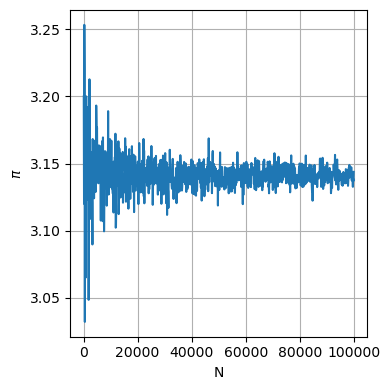

In [12]:
#! BEGIN ANSWER
pi_estimates = [] # Place where pi_estimates are stored
Ns = np.arange(100, 100000, 100) # arange(start,end,step)

# Looping over each number of points
for N in Ns:
  # Estimating pi and appending to pi_estimates
  pi_estimates.append(measure_pi(N))

# Plotting N vs pi estimates
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(Ns, pi_estimates)
plt.xlabel("N")
plt.ylabel("pi")
#! BEGIN EXCLUDE
plt.ylabel("$\\pi$")
plt.tight_layout()
#! END EXCLUDE
plt.grid()
plt.show()
#! END ANSWER

e) Make 1000 points and visualize the ones that fell in and out of the circle with a scatter plot. Make the points inside the circle red and the ones outside blue.

> Hint: the function `plt.scatter(x,y,...)` takes `c` as a keyword argument with a color (as a string `"blue"` or `"red"`) for each xy pair.

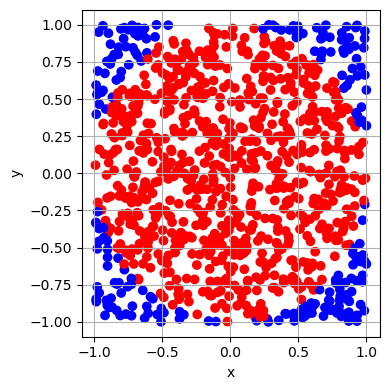

In [13]:
#! BEGIN ANSWER
# Generating the points
N = 1000
M = make_points(N)
x, y = M[0,:], M[1,:]

# Getting the colors
c = []
for i in range(N):
    if x[i]**2 + y[i]**2 <=1:
        c.append("red")
    else:
        c.append("blue")

# Plotting the result
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.scatter(x, y, c=c)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()
#! END ANSWER

> Now run the cell below to clear all your variables before moving on to the next exercise

In [14]:
%reset -f